# Sign Language Detection using YOLO11

In [35]:
!nvidia-smi

Wed Jan 15 16:48:49 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Step 01 # Install the Ultralytics Package

In [36]:
!pip install ultralytics

## Step 02 # Import All the Requried Libraries

In [37]:
from ultralytics import YOLO
from IPython.display import display, Image

## Step # 03 Download Dataset

In [38]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mKLo8Jlj6hy8KqEpN3qg")
project = rf.workspace("andres-calderon-unab").project("traffic-signs-dsjv6")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


## Step # 04 Train YOLO11 Model on a Custom Dataset

In [39]:
!yolo task=detect mode=train data="/content/Traffic-signs-3/data.yaml" model="yolo11n.pt" epochs=10 imgsz=640

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Traffic-signs-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

## Step # 05 Examine Training Results

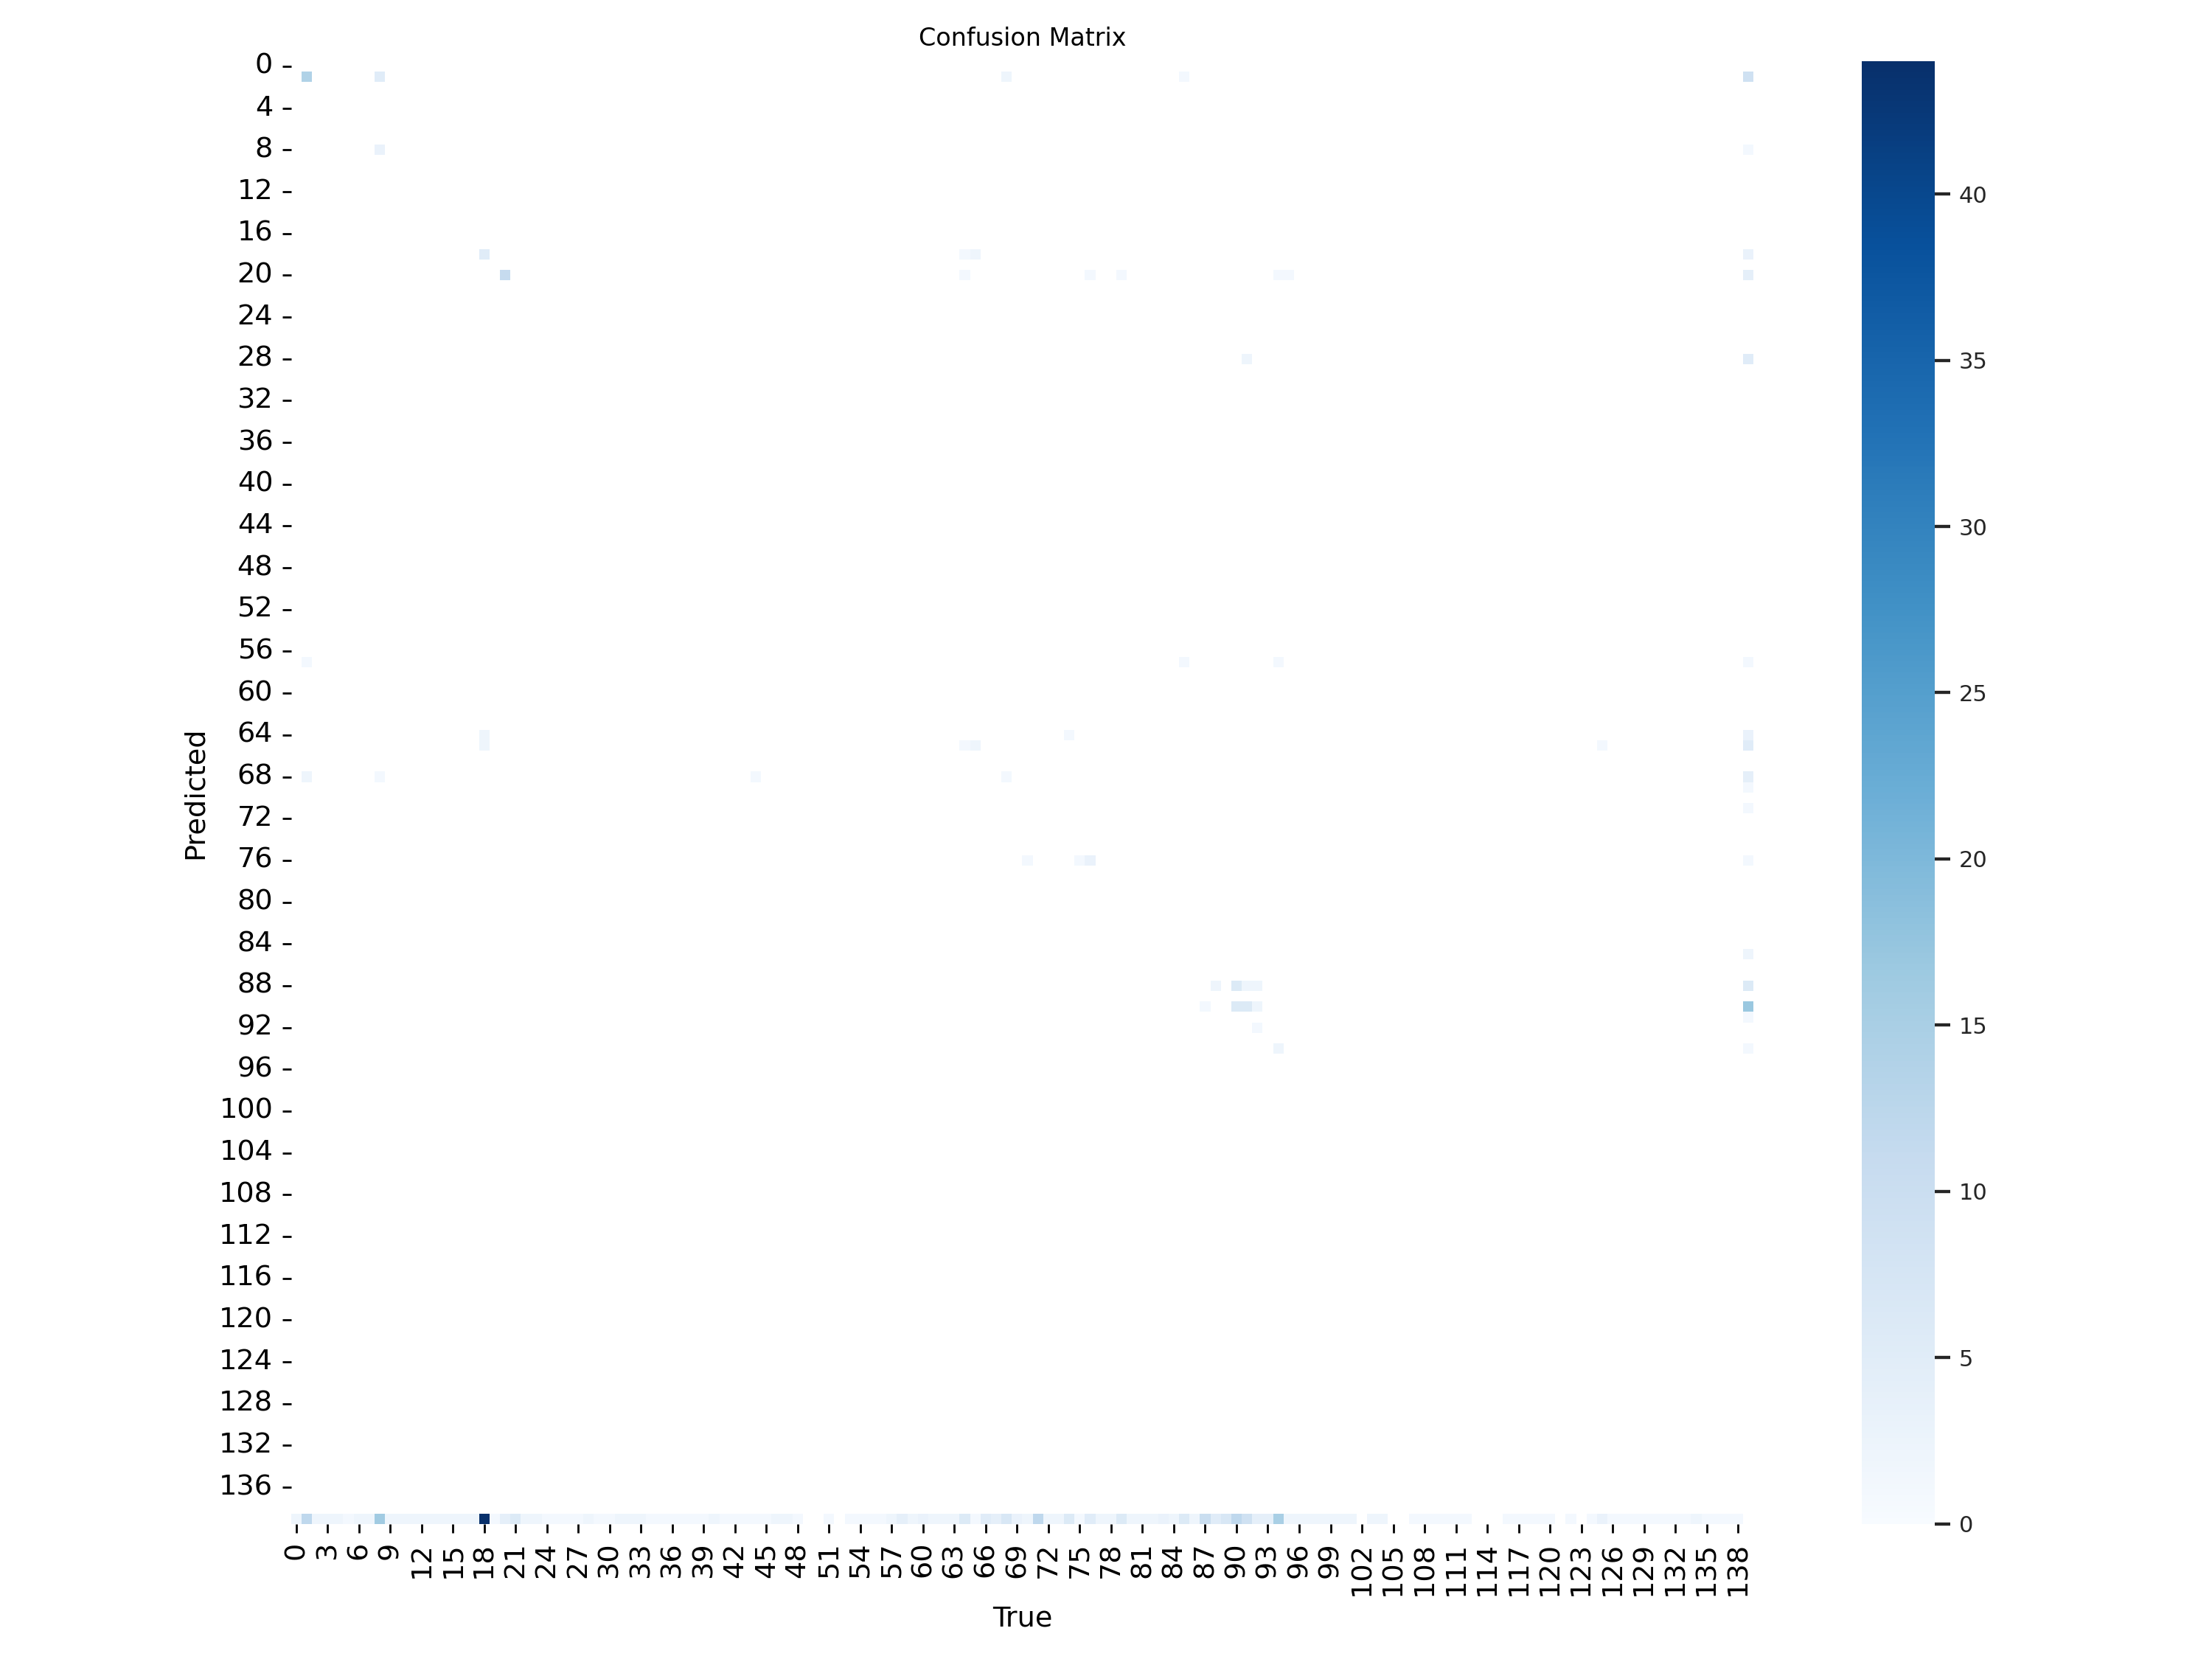

In [40]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

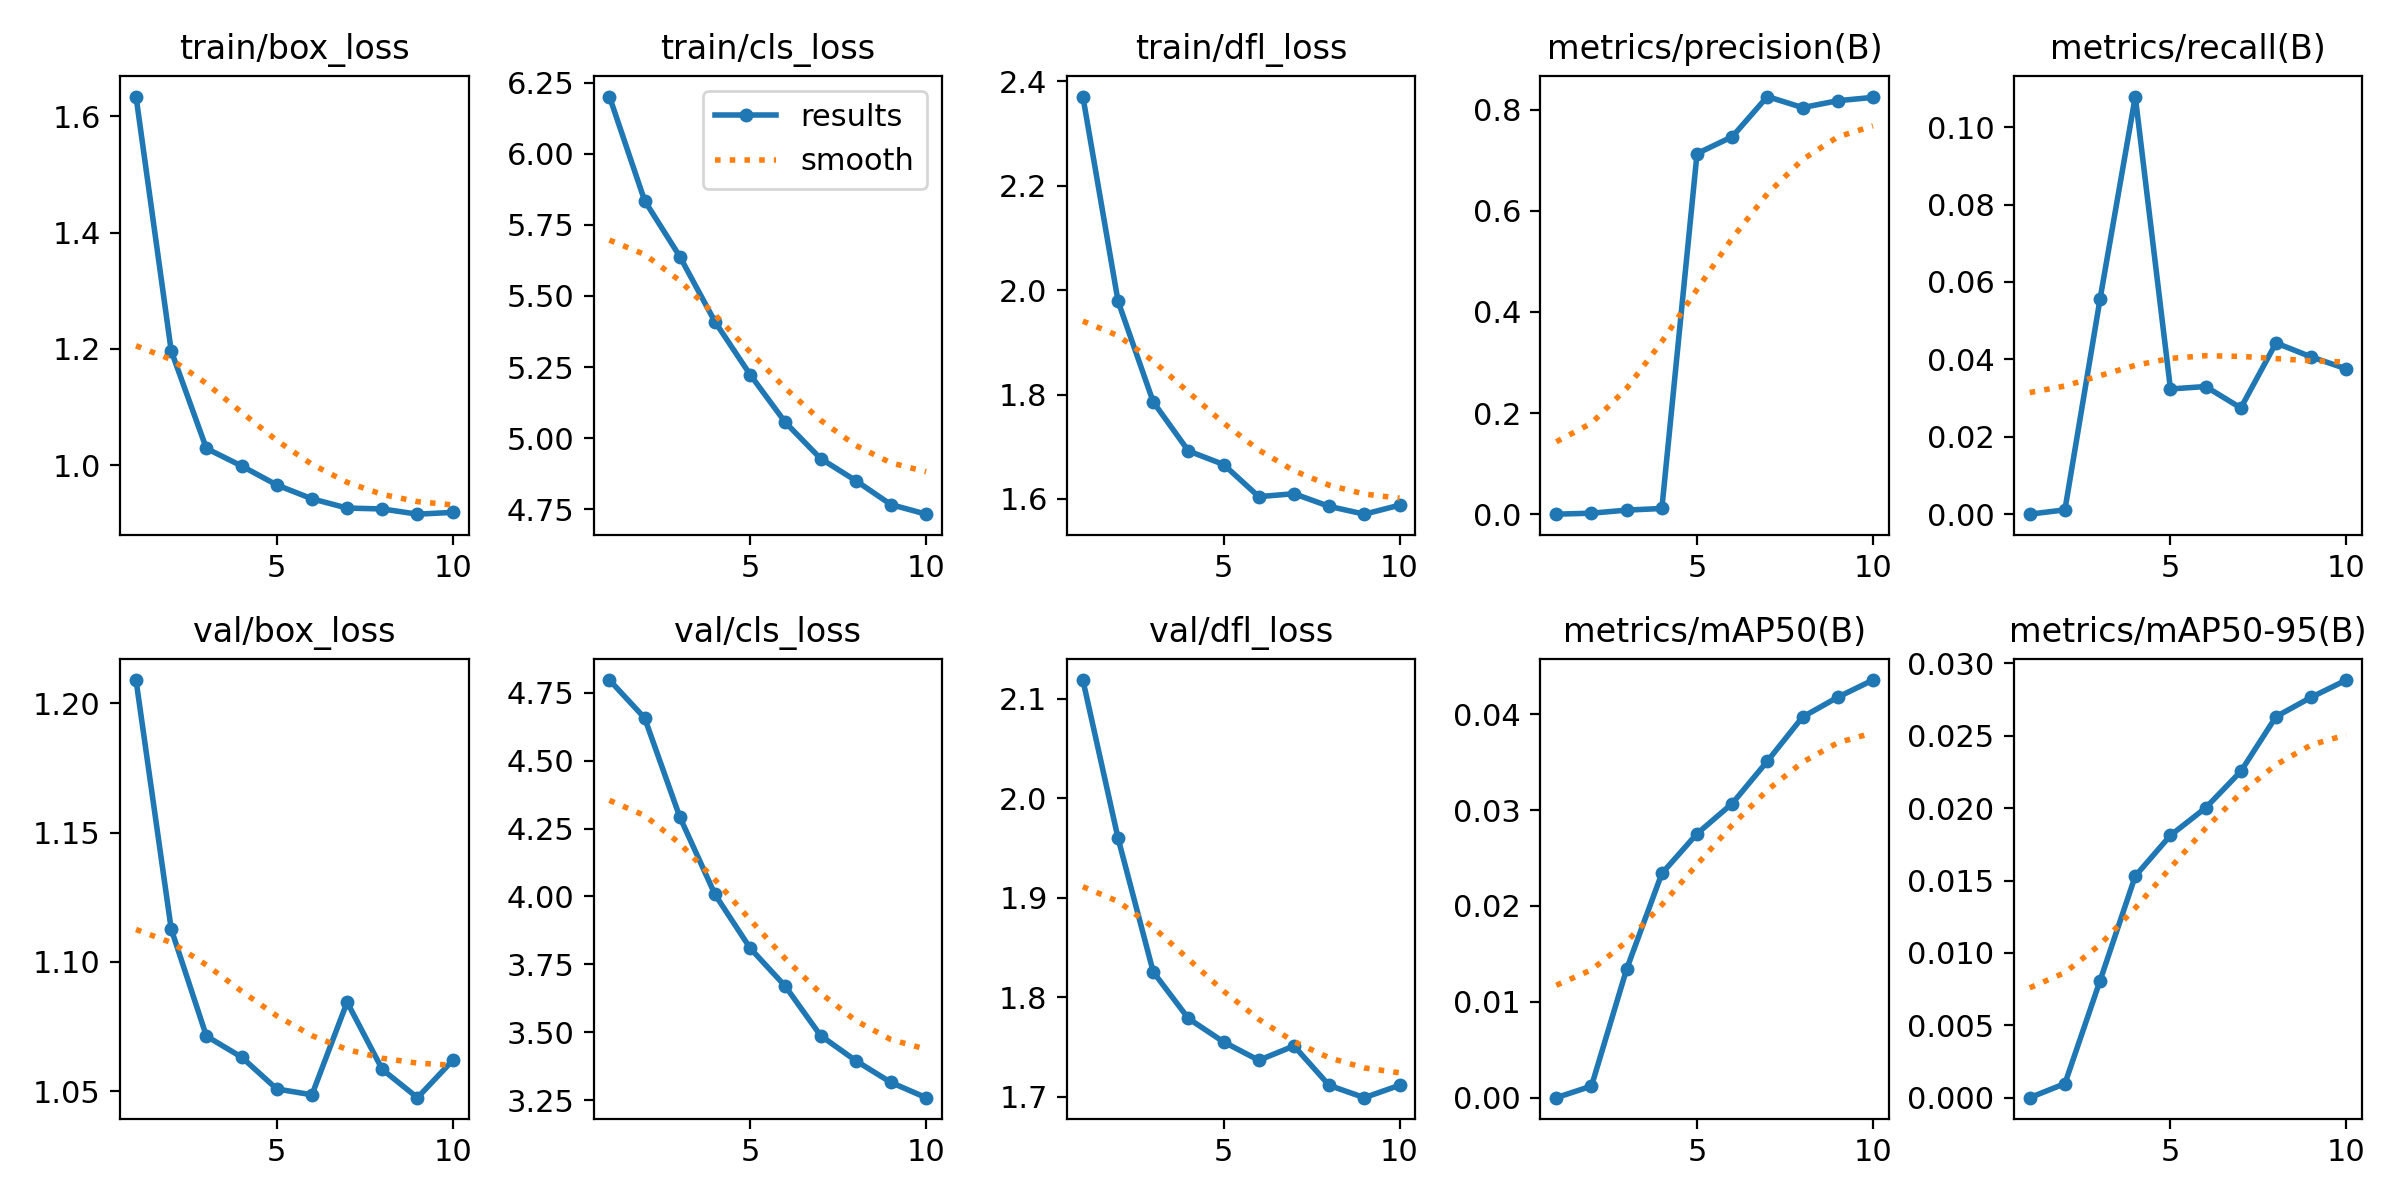

In [41]:
Image("/content/runs/detect/train2/results.png", height=600, width=1000)

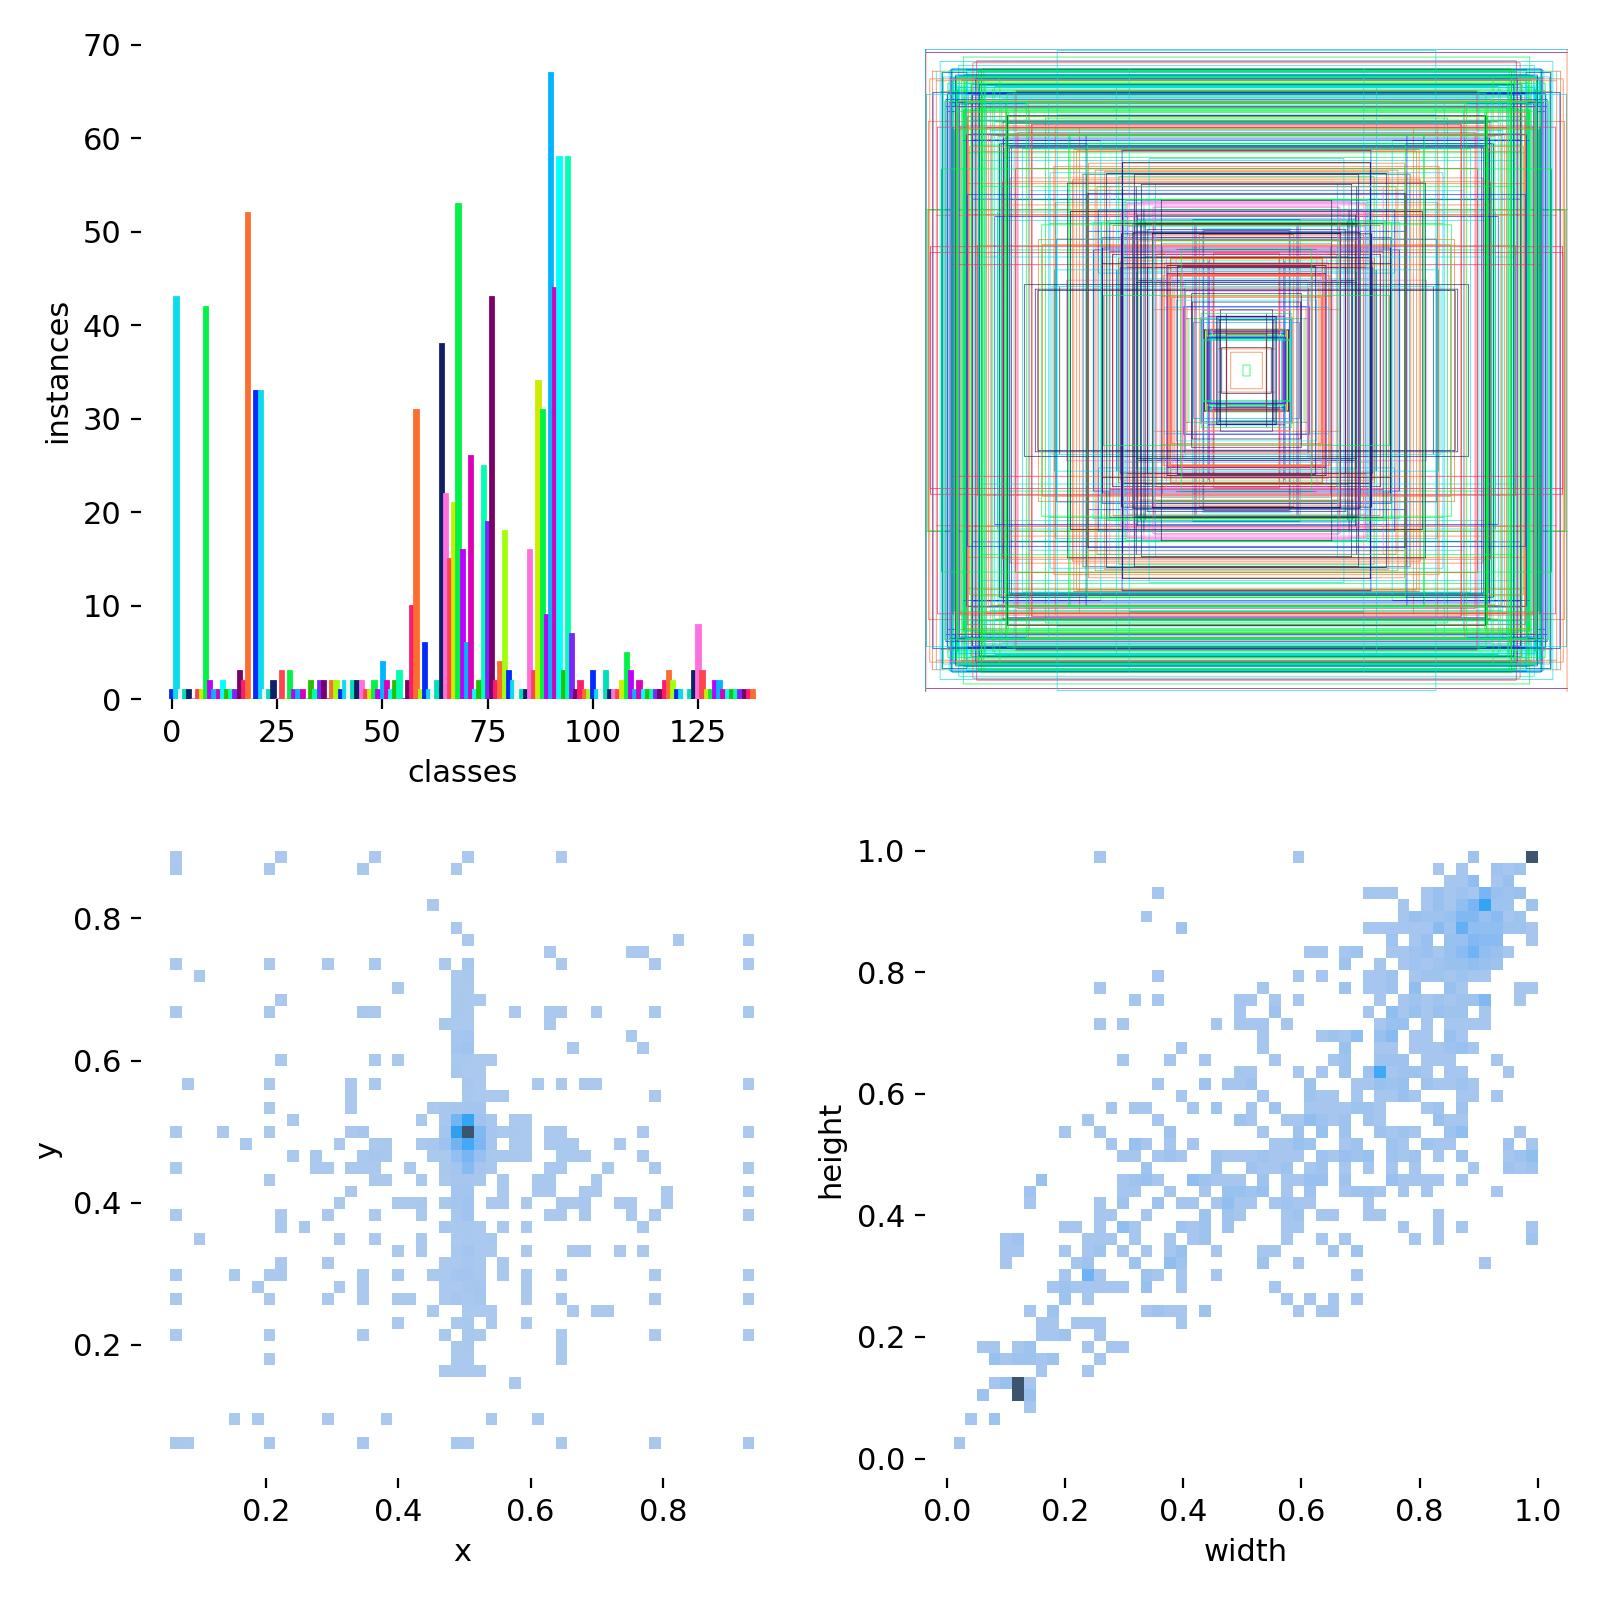

In [42]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

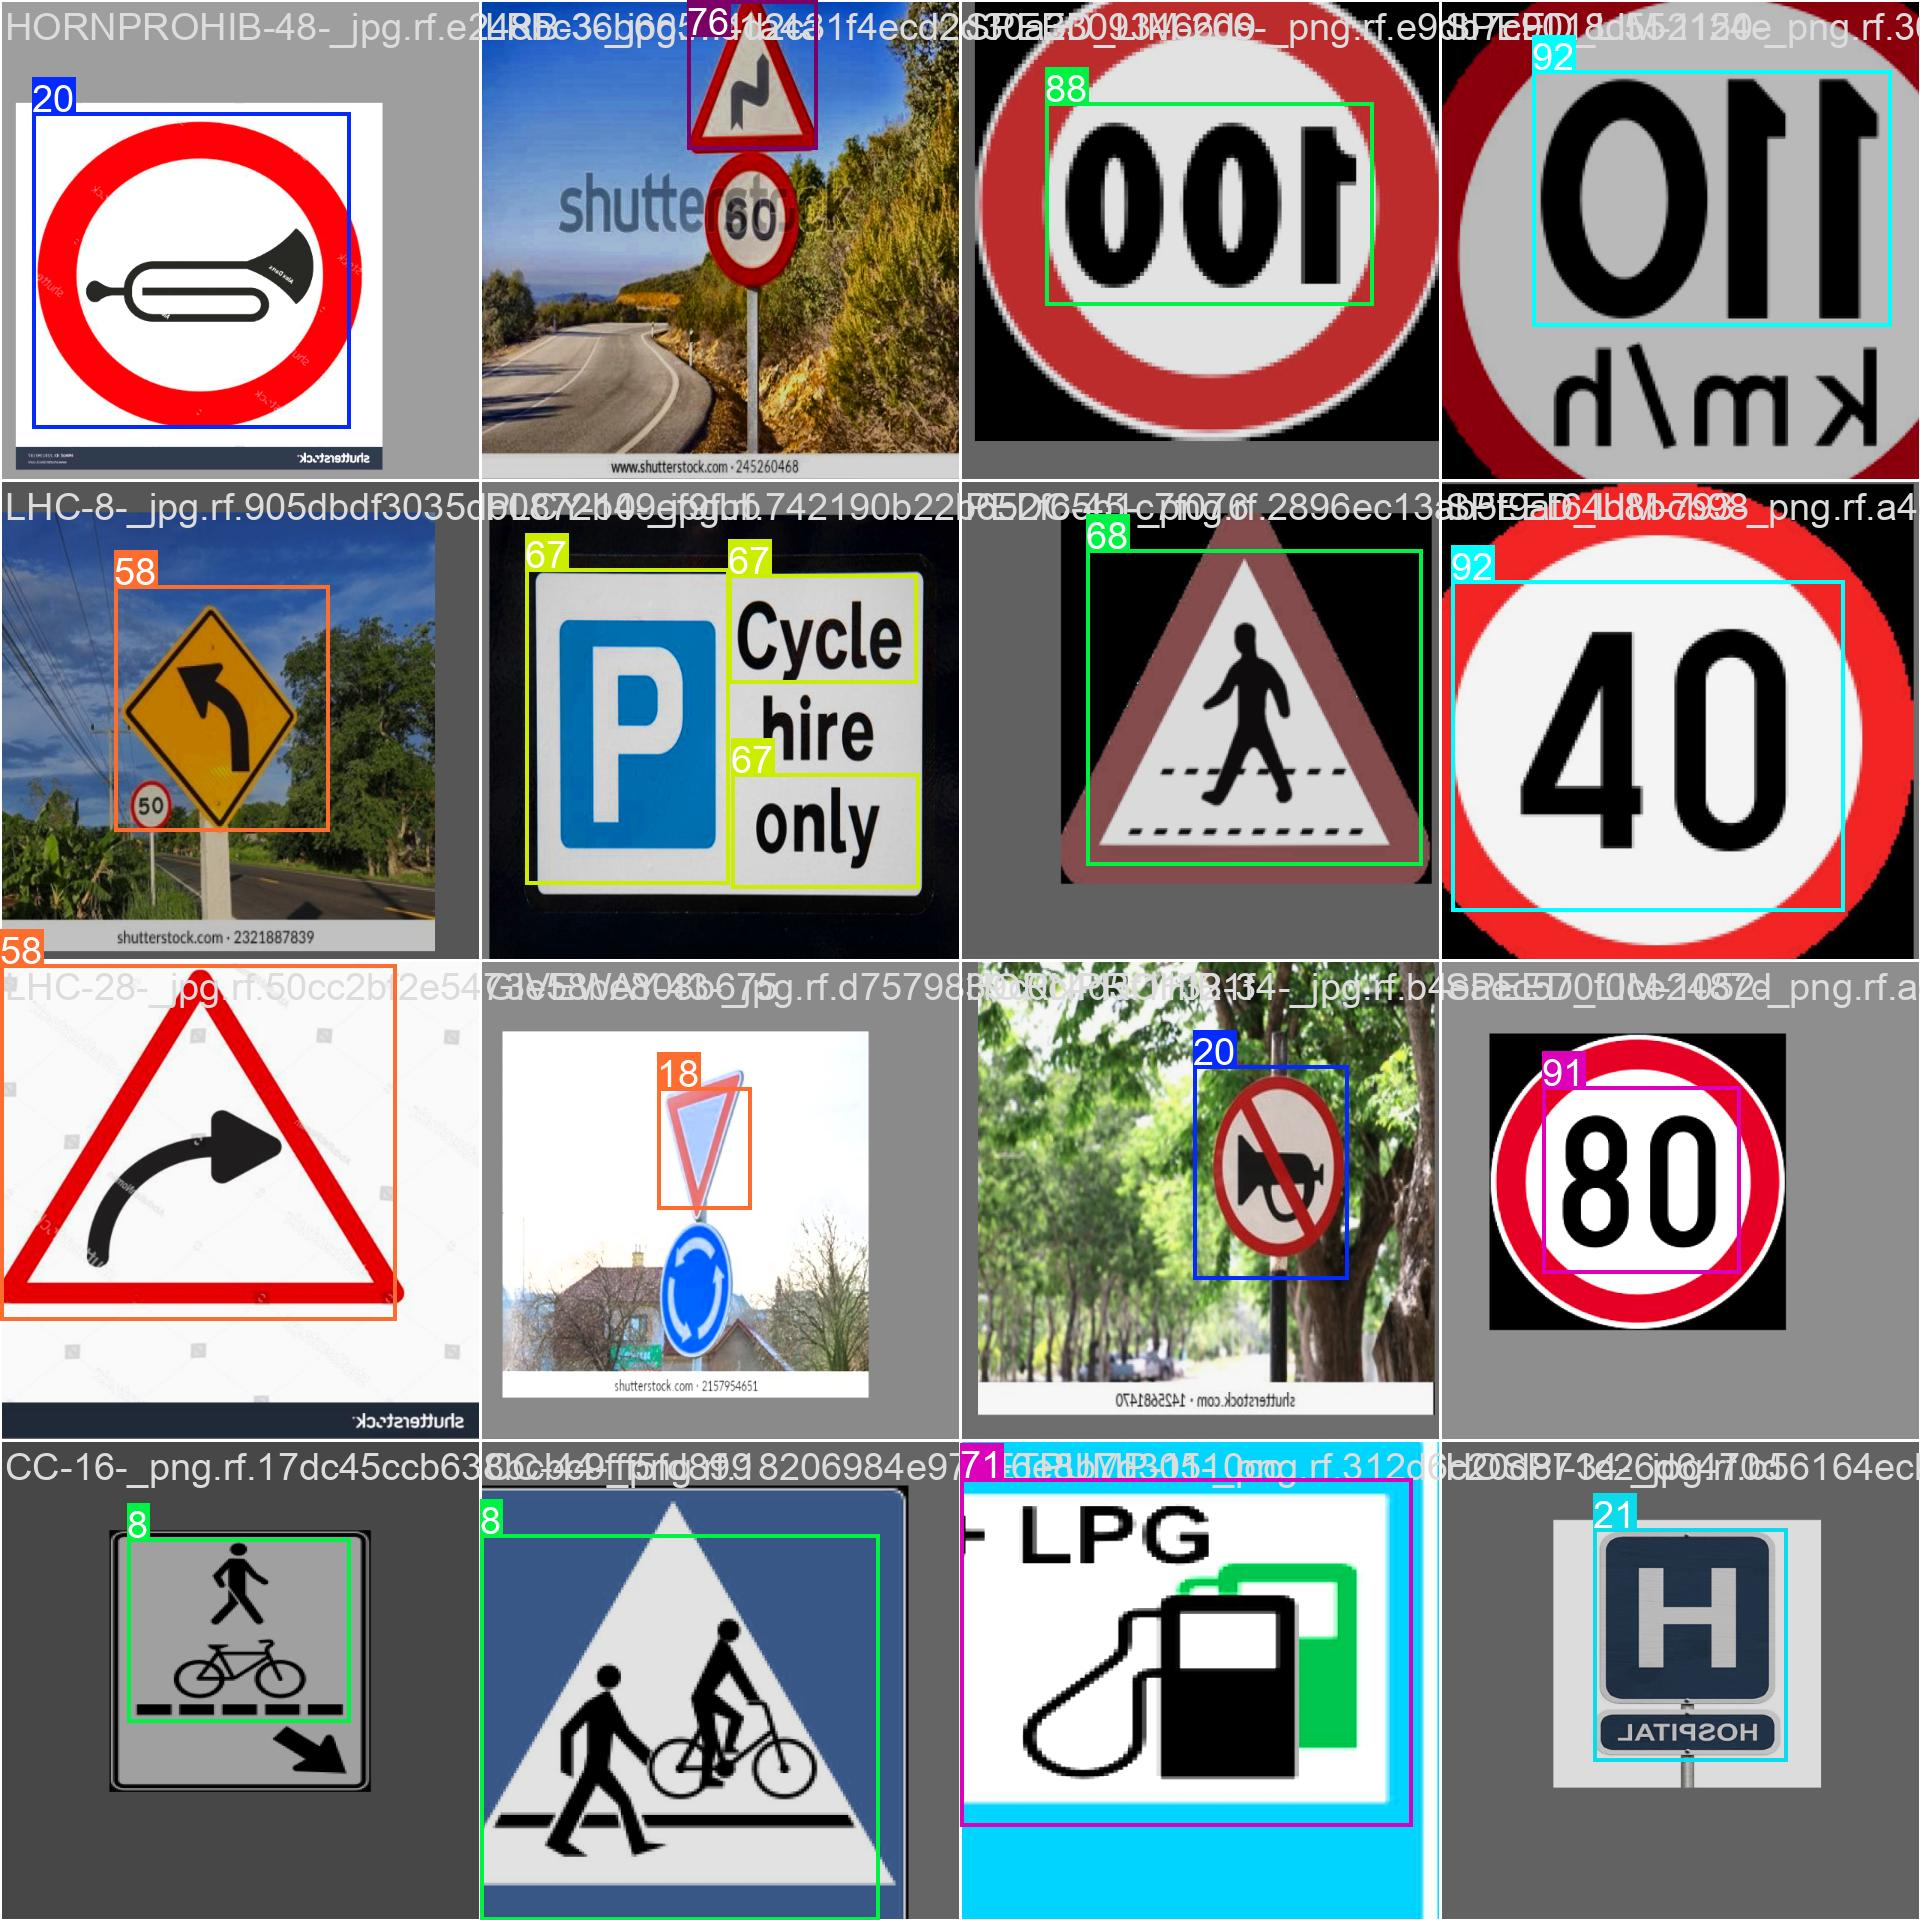

In [43]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

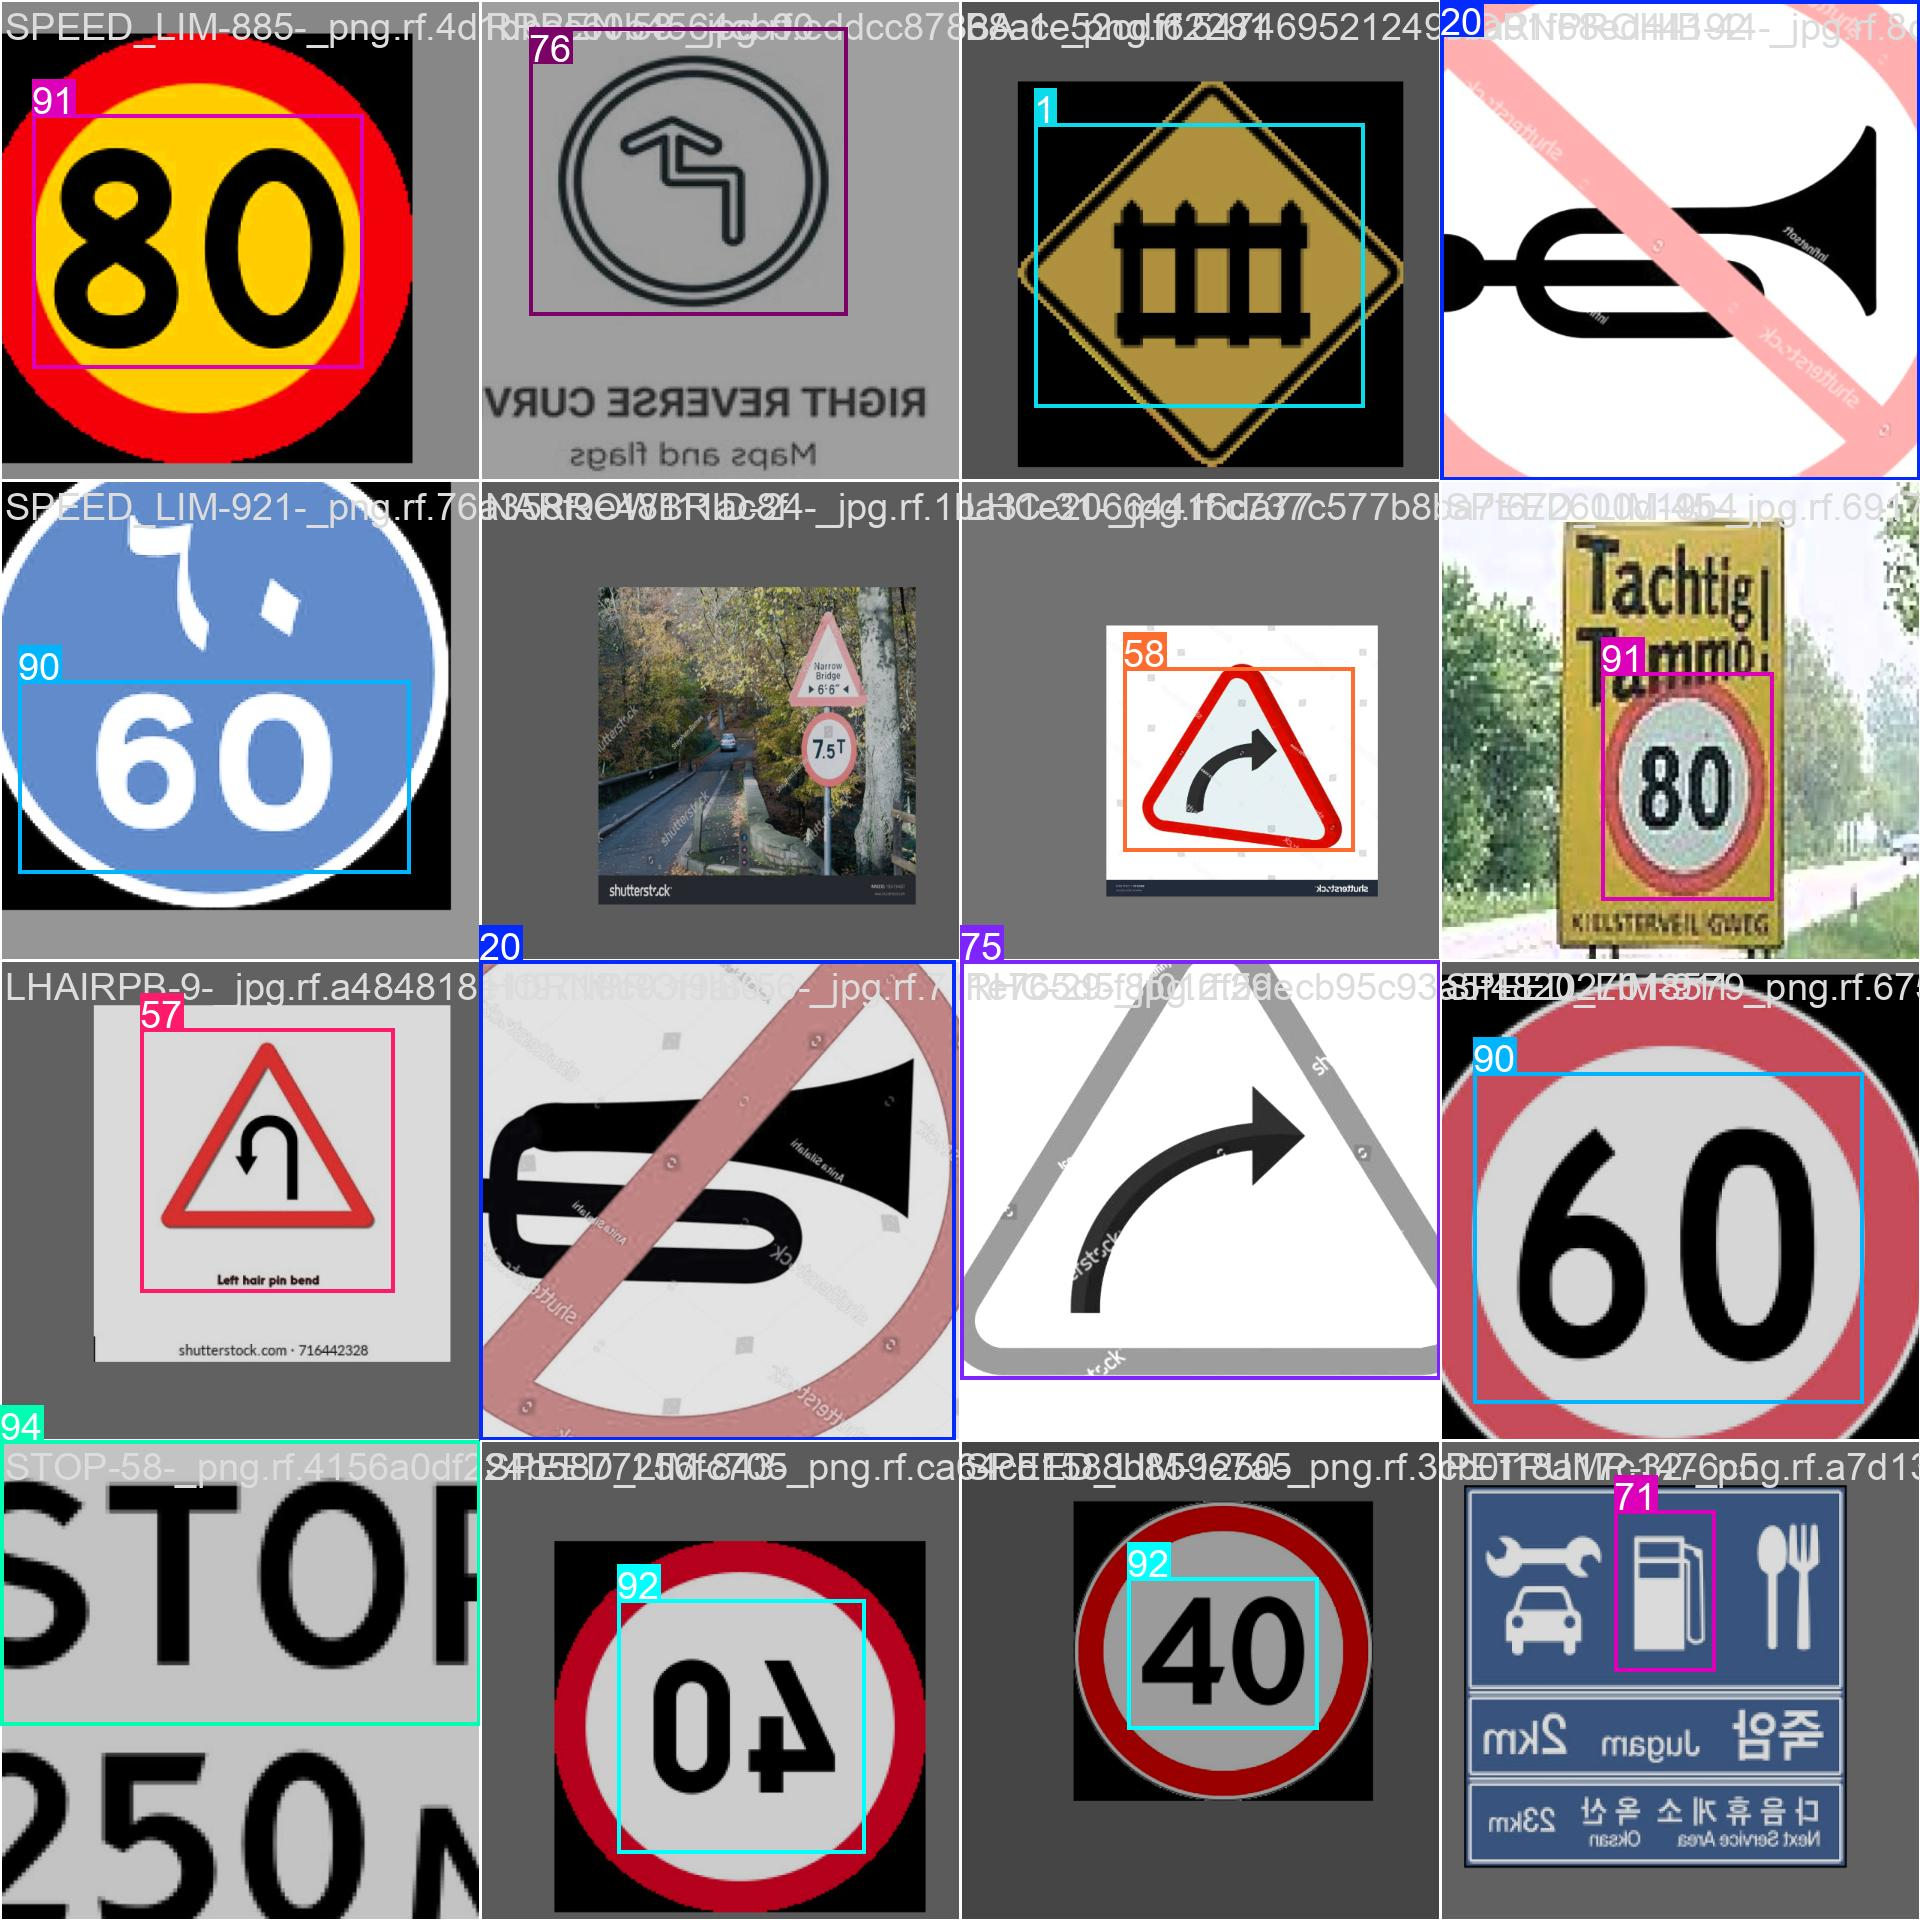

In [44]:
Image("/content/runs/detect/train2/train_batch1.jpg", width=600)

## Step # 08 Inference with Custom Model on Images

In [45]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/Traffic-signs-3/train/images" save=True

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,659,405 parameters, 0 gradients, 6.7 GFLOPs

image 1/931 /content/Traffic-signs-3/train/images/-2022-12-05-183721_png.rf.888e54b1d924bbe68117326ad1251283.jpg: 640x640 (no detections), 10.8ms
image 2/931 /content/Traffic-signs-3/train/images/-2022-12-05-183822_png.rf.da3067db38dbed57cf87897c419b30c5.jpg: 640x640 (no detections), 10.1ms
image 3/931 /content/Traffic-signs-3/train/images/-2022-12-05-184153_png.rf.755d5d562b4929e18b560e65efc32ba8.jpg: 640x640 1 Give Way, 1 No Stopping, 8.6ms
image 4/931 /content/Traffic-signs-3/train/images/-2022-12-05-184217_png.rf.c5a530c5027c3388960418b3d993a544.jpg: 640x640 (no detections), 11.5ms
image 5/931 /content/Traffic-signs-3/train/images/-2022-12-05-184304_png.rf.71bd2f9374a2984d8483d1f8dcab9cb6.jpg: 640x640 (no detections), 9.0ms
image 6/931 /content/Traffic-signs-3/train/images/-2022-12-05-184556_png.rf.4ef0ed00f17e7a7e1b7f

In [46]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[4:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

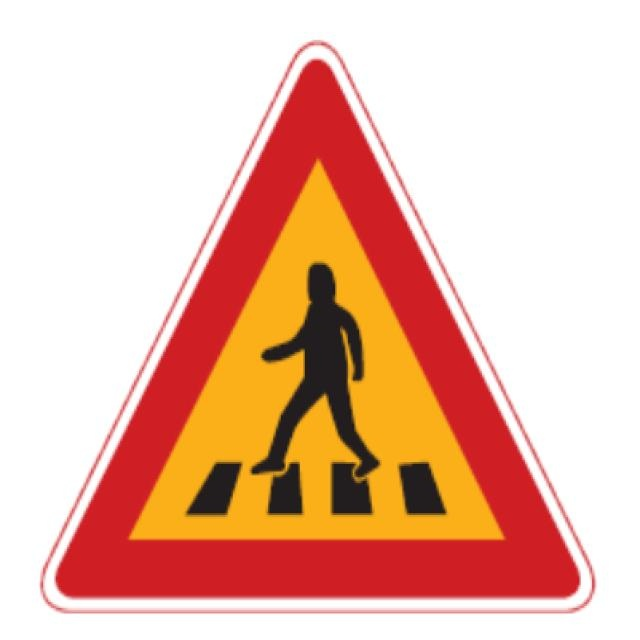

In [47]:
Image("/content/runs/detect/predict/crosswalk_PNG.rf.6fba46a0192b74d02578c29f900c5c4a.jpg", width=600)

In [48]:
!yolo task=detect mode=predict model= "/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/runs/detect/traffic1.png" save=True

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,659,405 parameters, 0 gradients, 6.7 GFLOPs

image 1/1 /content/runs/detect/traffic1.png: 576x640 1 Barrier Ahead, 84.3ms
Speed: 6.2ms preprocess, 84.3ms inference, 872.5ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


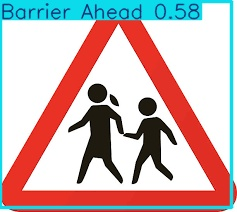

In [55]:
Image("/content/runs/detect/predict5/traffic1.jpg", width=600)

In [56]:
!yolo task=detect mode=predict model= "/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/runs/detect/sign1.png" save=True

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,659,405 parameters, 0 gradients, 6.7 GFLOPs

image 1/1 /content/runs/detect/sign1.png: 544x640 (no detections), 83.9ms
Speed: 5.8ms preprocess, 83.9ms inference, 37.4ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


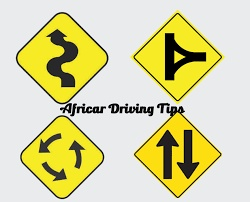

In [57]:
Image("/content/runs/detect/predict7/sign1.jpg", width=600)

In [61]:
!yolo task=detect mode=predict model= "/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/runs/detect/sign2.png" save=True

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,659,405 parameters, 0 gradients, 6.7 GFLOPs

image 1/1 /content/runs/detect/sign2.png: 640x608 (no detections), 49.9ms
Speed: 4.9ms preprocess, 49.9ms inference, 32.4ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


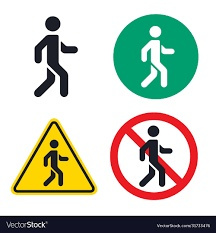

In [62]:
Image("/content/runs/detect/predict9/sign2.jpg", width=600)

## Step # 09 Inference with Custom Model on Videos

In [50]:
!yolo task=detect mode=predict model= "/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/runs/detect/helmet.mp4" save=True

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,659,405 parameters, 0 gradients, 6.7 GFLOPs

video 1/1 (frame 1/224) /content/runs/detect/helmet.mp4: 384x640 (no detections), 53.6ms
video 1/1 (frame 2/224) /content/runs/detect/helmet.mp4: 384x640 (no detections), 15.2ms
video 1/1 (frame 3/224) /content/runs/detect/helmet.mp4: 384x640 (no detections), 18.6ms
video 1/1 (frame 4/224) /content/runs/detect/helmet.mp4: 384x640 (no detections), 13.0ms
video 1/1 (frame 5/224) /content/runs/detect/helmet.mp4: 384x640 (no detections), 14.4ms
video 1/1 (frame 6/224) /content/runs/detect/helmet.mp4: 384x640 (no detections), 11.2ms
video 1/1 (frame 7/224) /content/runs/detect/helmet.mp4: 384x640 (no detections), 13.5ms
video 1/1 (frame 8/224) /content/runs/detect/helmet.mp4: 384x640 (no detections), 12.3ms
video 1/1 (frame 9/224) /content/runs/detect/helmet.mp4: 384x640 (no detections), 13.7ms
video 1/1 (frame 10/224) /content

In [63]:
# from IPython.display import HTML
# from base64 import b64encode
# import os

# # Input video path
# save_path = '/content/runs/detect/predict3/helmet.avi'

# # Compressed video path
# compressed_path = "/content/runs/detect/1.mp4"

# # Compress the video using ffmpeg
# os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# # Show the video
# with open(compressed_path, 'rb') as video_file:
#     mp4 = video_file.read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML(f"""<video width=600 controls>
#             <source src="{data_url}" type="video/mp4">
#           </video>""")
